In [1]:
import torch
from torch.autograd import Variable
from matplotlib import pyplot as plt
from IPython import display

In [2]:
torch.manual_seed(1000) #随机数种子

def get_fake_data(batch_size = 32):
    x = torch.rand(batch_size, 1)*20
    y = x*2 + (1 + torch.randn(batch_size, 1)) * 3 #添加噪声
    return x, y

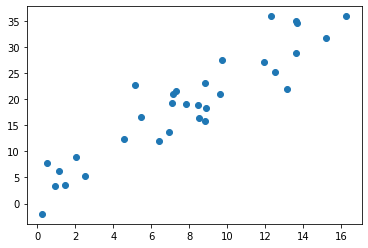

In [3]:
x, y = get_fake_data()
plt.scatter(x.squeeze().numpy(), y.squeeze().numpy())

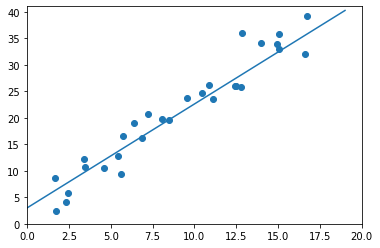

tensor(2.0361) tensor(2.9716)


In [4]:
#w = Variable(torch.randn(1), requires_grad = True)
#b = Variable(torch.randn(1), requires_grad = True)
w = torch.randn(1, requires_grad = True)
b = torch.randn(1, requires_grad = True)
lr = 0.0001
for i in range(8000):
    x, y = get_fake_data()
    
    #前向计算
    y_pred = w*x + b
    
    #loss
    loss = 0.5*(y_pred - y)**2
    loss = loss.sum()
    #backward
    loss.backward()
    
    #update
    w.data.sub_(lr*w.grad)
    b.data.sub_(lr*b.grad)
    
    #梯度清零，必须做到
    w.grad.zero_()
    b.grad.zero_()
    if i % 1000 == 0:
        display.clear_output(wait=True)
        x = torch.arange(0, 20).view(-1,1)
        y = w.data*x + b.data
        plt.plot(x.numpy(), y.data.numpy()) #predict
        
        x2, y2 = get_fake_data()
        plt.scatter(x2.numpy(), y2.numpy())
        
        plt.xlim(0, 20)
        plt.ylim(0, 41)
        plt.show()
        plt.pause(0.5)
print(w.data[0], b.data[0]) 